In [12]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [13]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [14]:
NUM_CLASSES = 16

# 学習データ読み込み

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 16)                176       
                                                                 
Total params: 1,246
Trainable params: 1,246
Non-trainable params: 0
_________________________________________________________________


In [20]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [21]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [22]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
34/39 [=========================>....] - ETA: 0s - loss: 2.7233 - accuracy: 0.1094
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 1s 13ms/step - loss: 2.7138 - accuracy: 0.1165 - val_loss: 2.6118 - val_accuracy: 0.2317
Epoch 2/1000
23/39 [================>.............] - ETA: 0s - loss: 2.5677 - accuracy: 0.1994
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 2.5405 - accuracy: 0.2096 - val_loss: 2.3989 - val_accuracy: 0.3061
Epoch 3/1000
22/39 [===============>..............] - ETA: 0s - loss: 2.3889 - accuracy: 0.2532
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 2.3550 - accuracy: 0.2633 - val_loss: 2.2011 - val_accuracy: 0.3409
Epoch 4/1000
21/39 [===============>..............] - ETA: 0s - loss: 2.2280 - accuracy: 0.3073


21/39 [===============>..............] - ETA: 0s - loss: 1.1528 - accuracy: 0.6019
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 1.1601 - accuracy: 0.5950 - val_loss: 0.7188 - val_accuracy: 0.8360
Epoch 29/1000
24/39 [=================>............] - ETA: 0s - loss: 1.1340 - accuracy: 0.6117
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 1.1483 - accuracy: 0.6068 - val_loss: 0.7066 - val_accuracy: 0.8348
Epoch 30/1000
23/39 [================>.............] - ETA: 0s - loss: 1.1526 - accuracy: 0.6005
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 1.1455 - accuracy: 0.6015 - val_loss: 0.6874 - val_accuracy: 0.8293
Epoch 31/1000
24/39 [=================>............] - ETA: 0s - loss: 1.1273 - accuracy: 0.6061
Epoch 31

22/39 [===============>..............] - ETA: 0s - loss: 0.9561 - accuracy: 0.6644
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.9809 - accuracy: 0.6539 - val_loss: 0.5104 - val_accuracy: 0.8567
Epoch 56/1000
23/39 [================>.............] - ETA: 0s - loss: 0.9741 - accuracy: 0.6522
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.9795 - accuracy: 0.6553 - val_loss: 0.5020 - val_accuracy: 0.8683
Epoch 57/1000
21/39 [===============>..............] - ETA: 0s - loss: 0.9732 - accuracy: 0.6585
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.9924 - accuracy: 0.6501 - val_loss: 0.4964 - val_accuracy: 0.8555
Epoch 58/1000
22/39 [===============>..............] - ETA: 0s - loss: 0.9952 - accuracy: 0.6495
Epoch 58

23/39 [================>.............] - ETA: 0s - loss: 0.9025 - accuracy: 0.6630
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.9204 - accuracy: 0.6653 - val_loss: 0.4406 - val_accuracy: 0.8994
Epoch 83/1000
23/39 [================>.............] - ETA: 0s - loss: 0.9356 - accuracy: 0.6797
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.9161 - accuracy: 0.6818 - val_loss: 0.4372 - val_accuracy: 0.8805
Epoch 84/1000
23/39 [================>.............] - ETA: 0s - loss: 0.9061 - accuracy: 0.6861
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.9057 - accuracy: 0.6871 - val_loss: 0.4290 - val_accuracy: 0.9006
Epoch 85/1000
23/39 [================>.............] - ETA: 0s - loss: 0.9001 - accuracy: 0.6858
Epoch 85

24/39 [=================>............] - ETA: 0s - loss: 0.8644 - accuracy: 0.7035
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8647 - accuracy: 0.7039 - val_loss: 0.3887 - val_accuracy: 0.9189
Epoch 110/1000
24/39 [=================>............] - ETA: 0s - loss: 0.8716 - accuracy: 0.6921
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8593 - accuracy: 0.6976 - val_loss: 0.3874 - val_accuracy: 0.9195
Epoch 111/1000
23/39 [================>.............] - ETA: 0s - loss: 0.8327 - accuracy: 0.7089
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8617 - accuracy: 0.6968 - val_loss: 0.3875 - val_accuracy: 0.9012
Epoch 112/1000
23/39 [================>.............] - ETA: 0s - loss: 0.8455 - accuracy: 0.7014
Ep

Epoch 136/1000
22/39 [===============>..............] - ETA: 0s - loss: 0.8291 - accuracy: 0.7092
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8372 - accuracy: 0.7074 - val_loss: 0.3514 - val_accuracy: 0.9091
Epoch 137/1000
23/39 [================>.............] - ETA: 0s - loss: 0.8224 - accuracy: 0.7140
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8316 - accuracy: 0.7151 - val_loss: 0.3557 - val_accuracy: 0.9140
Epoch 138/1000
22/39 [===============>..............] - ETA: 0s - loss: 0.8434 - accuracy: 0.7120
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8203 - accuracy: 0.7129 - val_loss: 0.3518 - val_accuracy: 0.9220
Epoch 139/1000
23/39 [================>.............] - ETA: 0s - loss: 0.8353 - accu

Epoch 163/1000
23/39 [================>.............] - ETA: 0s - loss: 0.8417 - accuracy: 0.7123
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8188 - accuracy: 0.7200 - val_loss: 0.3407 - val_accuracy: 0.9232
Epoch 164/1000
23/39 [================>.............] - ETA: 0s - loss: 0.8270 - accuracy: 0.7150
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8123 - accuracy: 0.7194 - val_loss: 0.3334 - val_accuracy: 0.9299
Epoch 165/1000
23/39 [================>.............] - ETA: 0s - loss: 0.8350 - accuracy: 0.7150
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8209 - accuracy: 0.7206 - val_loss: 0.3412 - val_accuracy: 0.9183
Epoch 166/1000
23/39 [================>.............] - ETA: 0s - loss: 0.7978 - accu

Epoch 190/1000
22/39 [===============>..............] - ETA: 0s - loss: 0.7917 - accuracy: 0.7259
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8011 - accuracy: 0.7204 - val_loss: 0.3262 - val_accuracy: 0.9293
Epoch 191/1000
24/39 [=================>............] - ETA: 0s - loss: 0.7971 - accuracy: 0.7292
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.8008 - accuracy: 0.7269 - val_loss: 0.3232 - val_accuracy: 0.9299
Epoch 192/1000
23/39 [================>.............] - ETA: 0s - loss: 0.7961 - accuracy: 0.7327
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.7941 - accuracy: 0.7306 - val_loss: 0.3184 - val_accuracy: 0.9299
Epoch 193/1000
23/39 [================>.............] - ETA: 0s - loss: 0.7892 - accu

Epoch 217/1000
21/39 [===============>..............] - ETA: 0s - loss: 0.8020 - accuracy: 0.7269
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.7980 - accuracy: 0.7218 - val_loss: 0.3138 - val_accuracy: 0.9244
Epoch 218/1000
22/39 [===============>..............] - ETA: 0s - loss: 0.7694 - accuracy: 0.7347
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.7635 - accuracy: 0.7363 - val_loss: 0.3082 - val_accuracy: 0.9274
Epoch 219/1000
22/39 [===============>..............] - ETA: 0s - loss: 0.7600 - accuracy: 0.7354
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.7701 - accuracy: 0.7359 - val_loss: 0.3065 - val_accuracy: 0.9341
Epoch 220/1000
22/39 [===============>..............] - ETA: 0s - loss: 0.8091 - accu

Epoch 244/1000
23/39 [================>.............] - ETA: 0s - loss: 0.7553 - accuracy: 0.7388
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.7626 - accuracy: 0.7371 - val_loss: 0.2991 - val_accuracy: 0.9262
Epoch 245/1000
22/39 [===============>..............] - ETA: 0s - loss: 0.7693 - accuracy: 0.7464
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.7618 - accuracy: 0.7401 - val_loss: 0.2975 - val_accuracy: 0.9305
Epoch 246/1000
23/39 [================>.............] - ETA: 0s - loss: 0.7348 - accuracy: 0.7541
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
39/39 [==============================] - 0s 5ms/step - loss: 0.7283 - accuracy: 0.7556 - val_loss: 0.2910 - val_accuracy: 0.9341
Epoch 247/1000
23/39 [================>.............] - ETA: 0s - loss: 0.7738 - accu

In [23]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.9299


In [24]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [25]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[6.41060528e-16 2.53585056e-22 2.54238218e-27 2.93499079e-11
 4.52851282e-07 2.18323526e-26 9.99998331e-01 1.18488128e-06
 2.44169187e-22 6.63607233e-28 2.87281216e-17 1.82193134e-16
 1.42167863e-17 1.01363905e-25 5.54649212e-26 5.28109373e-15]
6


# 混同行列

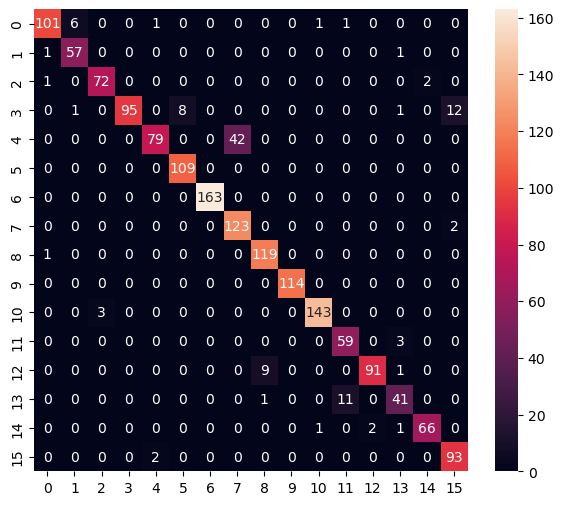

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       110
           1       0.89      0.97      0.93        59
           2       0.96      0.96      0.96        75
           3       1.00      0.81      0.90       117
           4       0.96      0.65      0.78       121
           5       0.93      1.00      0.96       109
           6       1.00      1.00      1.00       163
           7       0.75      0.98      0.85       125
           8       0.92      0.99      0.96       120
           9       1.00      1.00      1.00       114
          10       0.99      0.98      0.98       146
          11       0.83      0.95      0.89        62
          12       0.98      0.90      0.94       101
          13       0.85      0.77      0.81        53
          14       0.97      0.94      0.96        70
          15       0.87      0.98      0.92        95

    accuracy                           0.93      1640
   m

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [27]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [28]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asus\AppData\Local\Temp\tmp9cl22nnh\assets


6960

# 推論テスト

In [29]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [30]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [31]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [32]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.41058146e-16 2.53585030e-22 2.54240163e-27 2.93498559e-11
 4.52849548e-07 2.18324343e-26 9.99998331e-01 1.18487662e-06
 2.44169161e-22 6.63609688e-28 2.87281216e-17 1.82193121e-16
 1.42167863e-17 1.01363905e-25 5.54649150e-26 5.28109457e-15]
6
